# Data Cleaning Notebook for Combined PUF File

DeSYNPuf Exploration & Cleanup

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

This file is 1/3 of a GB in size.

In [2]:
desynpuf = pd.read_csv("/home/kylier/python/DS/data/PUF/IPANDOP_FIPS_ALL.csv")

/home/kylier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (59,69,71,72,74,75,95,96,98,102,104,115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Drop the first 2 columns (created when the csv file was written out)

Show nulls

In [3]:
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.isnull().sum() 

DESYNPUF_ID               0
BENE_BIRTH_DT             0
BENE_DEATH_DT        981851
BENE_SEX_IDENT_CD         0
BENE_RACE_CD              0
                      ...  
HCPCS_CD_44          981241
HCPCS_CD_45          991604
CLAIM_TYPE           149316
BENE_AGE             149316
YEAR                      0
Length: 122, dtype: int64

Almost 1 million rows

In [4]:
desynpuf.shape

(991604, 122)

In [5]:
for c in desynpuf.columns:
    print(c)

DESYNPUF_ID
BENE_BIRTH_DT
BENE_DEATH_DT
BENE_SEX_IDENT_CD
BENE_RACE_CD
BENE_ESRD_IND
SP_STATE_CODE
BENE_COUNTY_CD
BENE_HI_CVRAGE_TOT_MONS
BENE_SMI_CVRAGE_TOT_MONS
BENE_HMO_CVRAGE_TOT_MONS
PLAN_CVRG_MOS_NUM
SP_ALZHDMTA
SP_CHF
SP_CHRNKIDN
SP_CNCR
SP_COPD
SP_DEPRESSN
SP_DIABETES
SP_ISCHMCHT
SP_OSTEOPRS
SP_RA_OA
SP_STRKETIA
MEDREIMB_IP
BENRES_IP
PPPYMT_IP
MEDREIMB_OP
BENRES_OP
PPPYMT_OP
MEDREIMB_CAR
BENRES_CAR
PPPYMT_CAR
FIPS_COUNTY_CODE
FULL_FIPS_CODE
CBSA
CBSA_NAME
FIPS_STATE_CODE
CLM_ID
SEGMENT
CLM_FROM_DT
CLM_THRU_DT
PRVDR_NUM
CLM_PMT_AMT
NCH_PRMRY_PYR_CLM_PD_AMT
AT_PHYSN_NPI
OP_PHYSN_NPI
OT_PHYSN_NPI
CLM_ADMSN_DT
ADMTNG_ICD9_DGNS_CD
CLM_PASS_THRU_PER_DIEM_AMT
NCH_BENE_IP_DDCTBL_AMT
NCH_BENE_PTB_DDCTBL_AMT
NCH_BENE_PTA_COINSRNC_LBLTY_AM
NCH_BENE_PTB_COINSRNC_AMT
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM
CLM_UTLZTN_DAY_CNT
NCH_BENE_DSCHRG_DT
CLM_DRG_CD
ICD9_DGNS_CD_1
ICD9_DGNS_CD_2
ICD9_DGNS_CD_3
ICD9_DGNS_CD_4
ICD9_DGNS_CD_5
ICD9_DGNS_CD_6
ICD9_DGNS_CD_7
ICD9_DGNS_CD_8
ICD9_DGNS_CD_9
ICD9_DGNS_CD

## Age

This data is slightly more normally-distributed.  The mean age is 73, the median age is 74. IQR is 15, making anyone under 67 years old in the <25th percentile.  

Not surprising - these are Medicare beneficiaries.  Only those who are disabled are eligible at <65 years.

<AxesSubplot:xlabel='BENE_AGE', ylabel='Count'>

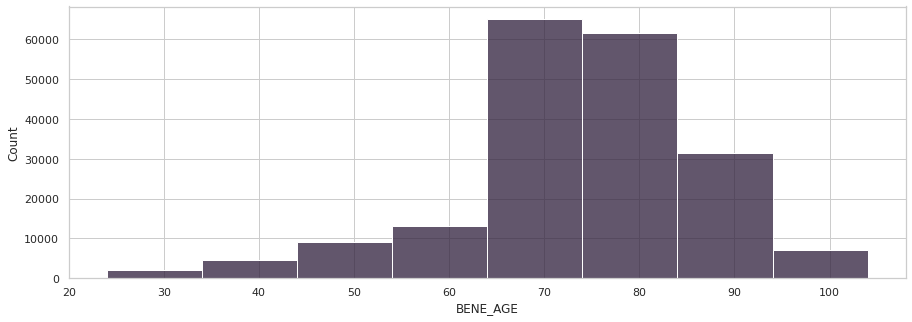

In [6]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean()), binwidth=10)

In [7]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean().describe()

count    194068.000000
mean         73.159626
std          12.768693
min          24.000000
25%          67.666667
50%          74.000000
75%          81.625000
max         102.000000
Name: BENE_AGE, dtype: float64

## Race Codes

NaN	UNKNOWN

1	NON-HISPANIC WHITE

2	BLACK (OR AFRICAN-AMERICAN)

3	OTHER

4	ASIAN/PACIFIC ISLANDER

5	HISPANIC

6	AMERICAN INDIAN / ALASKA NATIVE

<AxesSubplot:xlabel='BENE_RACE_CD', ylabel='count'>

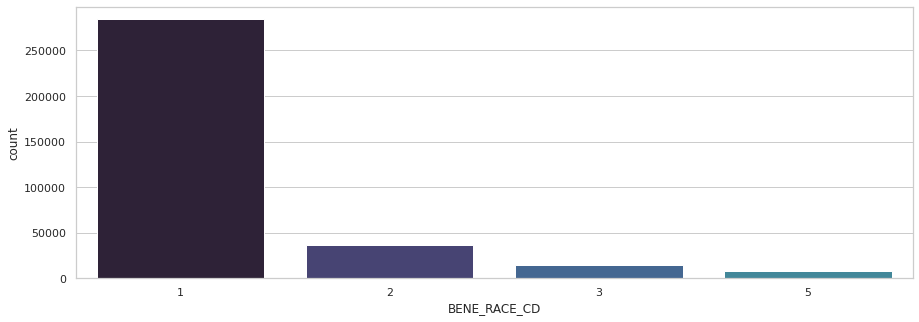

In [8]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean()))

For this data set, the beneficiary population is 84% white, 11% Black or African American, 2.3% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

In [11]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean().value_counts(normalize=True)

1    0.826797
2    0.107737
3    0.042233
5    0.023233
Name: BENE_RACE_CD, dtype: float64

## Sex

1 MALE, 2 FEMALE recoded to 1 MALE, 0 FEMALE

<AxesSubplot:xlabel='B_SEX', ylabel='count'>

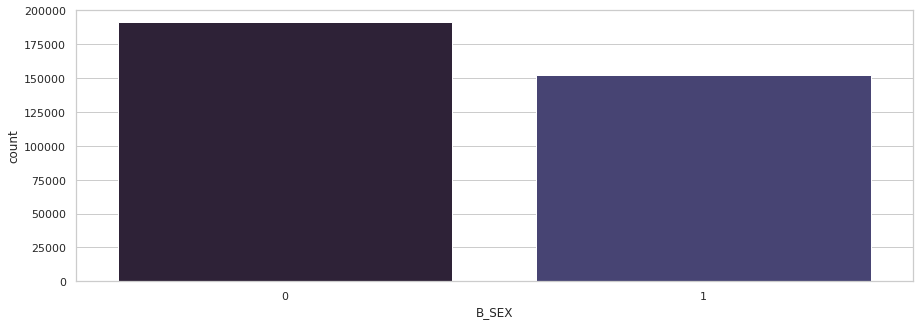

In [12]:
desynpuf["B_SEX"] = desynpuf["BENE_SEX_IDENT_CD"].replace(2, 0)

sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean())

In [13]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean().value_counts(normalize=True)

0    0.556415
1    0.443585
Name: B_SEX, dtype: float64

## Chronic Conditions

Alzheimer's & Related SP_ALZHDMTA 1=Yes, 2=No

Congestive Heart Failure SP_CHF 1=Yes, 2=No

Cancer SP_CNCR 1=Yes, 2=No

Depression SP_DEPRESSN 1=Yes, 2=No

Diabetes SP_DIABETES 1=Yes, 2=No

Ischemic Heart Disease SP_ISCHMCHT 1=Yes, 2=No

Osteoporosis SP_OSTEOPRS 1=Yes, 2=No

COPD SP_COPD 1=Yes, 2=No

Chronic Kidney Disease SP_CHRNKIDN 1=Yes, 2=No

Rheumatoid or Osteoarthritis SP_RA_OA 1=Yes, 2=No

Stroke or TIA SP_STRKETIA 1=Yes, 2=No

ESRD Y=Yes, 0=No, recoded to 1=Yes, 2=No

In [14]:
desynpuf["SP_ESRD"] = desynpuf["BENE_ESRD_IND"].replace("Y", 1).astype(int)
desynpuf["SP_ESRD"] = desynpuf["SP_ESRD"].replace(0, 2).astype(int)
desynpuf["CLM_ADMSN_DT"] = pd.to_datetime(desynpuf["CLM_ADMSN_DT"], format="%Y%m%d")
desynpuf["NCH_BENE_DSCHRG_DT"] = pd.to_datetime(desynpuf["NCH_BENE_DSCHRG_DT"], format="%Y%m%d")

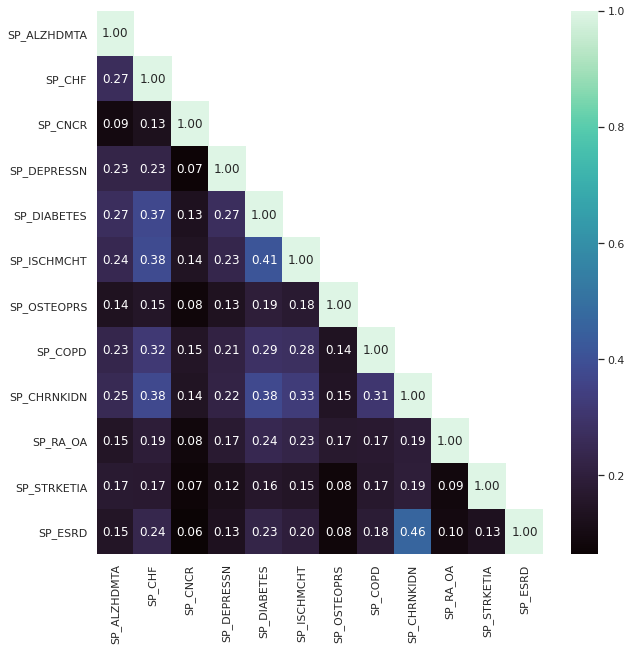

In [15]:
conditions = desynpuf[["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", 
                        "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA", "SP_ESRD"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

Note the clinically understood correlations between diabetes, ischemic heart disease, CHF and CKD.

They are known to be causally connected on the basis of their pathophysiology.

Obviously, so are ESRD and CKD, which are two points on the same disease continuum.

There are also moderate correlations between depression, dementia, COPD and the DM/CHF/Heart Disease/CKD group.

Strangly, there appears to be a weaker correlation between stroke / TIA and these diseases.

While RA & OA produce similar disability in advanced stages, they have almost nothing in common in terms of pathophysiology or disease course.

In [16]:
# Re-code the conditions indicators as dummy variables
# "SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", SP_OSTEOPRS"
# "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA" and "SP_STRKETIA"  

desynpuf["B_ALZHDMTA"] = desynpuf["SP_ALZHDMTA"].replace(2, 0).astype(int)
desynpuf["B_CHF"] = desynpuf["SP_CHF"].replace(2, 0).astype(int)
desynpuf["B_CNCR"] = desynpuf["SP_CNCR"].replace(2, 0).astype(int)
desynpuf["B_COPD"] = desynpuf["SP_COPD"].replace(2, 0).astype(int)
desynpuf["B_DEPRESSN"] = desynpuf["SP_DEPRESSN"].replace(2, 0).astype(int)
desynpuf["B_DIABETES"] = desynpuf["SP_DIABETES"].replace(2, 0).astype(int)
desynpuf["B_ISCHMCHT"] = desynpuf["SP_ISCHMCHT"].replace(2, 0).astype(int)
desynpuf["B_OSTEOPRS"] = desynpuf["SP_OSTEOPRS"].replace(2, 0).astype(int)
desynpuf["B_CHRNKIDN"] = desynpuf["SP_CHRNKIDN"].replace(2, 0).astype(int)
desynpuf["B_RA_OA"] = desynpuf["SP_RA_OA"].replace(2, 0).astype(int)
desynpuf["B_STRKETIA"] = desynpuf["SP_STRKETIA"].replace(2, 0).astype(int)
desynpuf["B_ESRD"] = desynpuf["SP_ESRD"].replace(2, 0).astype(int)


## Create Summaries

For each year;
For all 3 years



In [17]:
cc_summary = desynpuf.groupby(["DESYNPUF_ID", "YEAR"]).aggregate({"BENE_AGE":"mean",
                                                                                  "B_SEX":"mean",
                                                                                  "BENE_RACE_CD":"mean",
                                                                                  "B_ALZHDMTA":"sum",
                                                                                  "B_CHF":"sum",
                                                                                  "B_CNCR":"sum",
                                                                                  "B_COPD":"sum",
                                                                                  "B_DEPRESSN":"sum",
                                                                                  "B_DIABETES":"sum",
                                                                                  "B_ISCHMCHT":"sum",
                                                                                  "B_OSTEOPRS":"sum",
                                                                                  "B_CHRNKIDN":"sum",
                                                                                  "B_RA_OA":"sum",
                                                                                  "B_STRKETIA":"sum",
                                                                                  "B_ESRD":"sum",
                                                                                  "BENE_HI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_SMI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_HMO_CVRAGE_TOT_MONS":"mean",
                                                                                  "PLAN_CVRG_MOS_NUM":"mean",
                                                                                  "CLAIM_TYPE":"count",
                                                                                  "CLM_ID":"count",
                                                                                  "PRVDR_NUM":"nunique",
                                                                                  "CLM_PMT_AMT":"sum",
                                                                                  "NCH_PRMRY_PYR_CLM_PD_AMT":"sum",
                                                                                  "AT_PHYSN_NPI":"nunique",
                                                                                  "OP_PHYSN_NPI":"nunique",
                                                                                  "OT_PHYSN_NPI":"nunique",
                                                                                  "ADMTNG_ICD9_DGNS_CD":["nunique", "count"],
                                                                                  "CLM_UTLZTN_DAY_CNT":["sum","mean","min","max"],
                                                                                  "CLM_DRG_CD":["nunique", "count"],
                                                                                  "MEDREIMB_IP":"sum",
                                                                                  "BENRES_IP":"sum",
                                                                                  "PPPYMT_IP":"sum",
                                                                                  "MEDREIMB_OP":"sum",
                                                                                  "BENRES_OP":"sum",
                                                                                  "PPPYMT_OP":"sum",
                                                                                  "CBSA":"mean",
                                                                                  "FIPS_STATE_CODE":"mean",
                                                                                  "FIPS_COUNTY_CODE":"mean"})



In [19]:
cc_summary.columns = ["MEAN_AGE", "B_SEX", "BENE_RACE_CD", "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_COPD",
                      "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", "B_OSTEOPRS", "B_CHRNKIDN", "B_RA_OA",
                      "B_STRKETIA", "B_ESRD", "MEAN_HI_CVRAGE_TOT_MONS", "MEAN_SMI_CVRAGE_TOT_MONS",
                      "MEAN_HMO_CVRAGE_TOT_MONS", "MEAN_CVRG_MOS_NUM", "TOTAL_VISITS","TOTAL_CLAIMS",
                      "NUM_PRVDRS", "TOT_CLM_PMT_AMT", "TOT_NCH_PRMRY_PYR_CLM_PD_AMT","NUM_AT_PHYSNS",
                      "NUM_OP_PHYSNS","NUM_OT_PHYSNS","UNQ_ADMTNG_ICD9_CDS", "TOT_ADMTNG_ICD9_CDS",
                      "TOTAL_INP_DAYS", "MEAN_INP_STAY", "MIN_INP_STAY", "MAX_INP_STAY","UNQ_CLM_DRG_CDS",
                      "TOT_CLM_DRG_CDS", "TOT_MEDREIMB_IP", "TOT_BENRES_IP", "TOT_PPPYMT_IP", "TOT_MEDREIMB_OP",
                       "TOT_BENRES_OP","TOT_PPPYMT_OP", "CBSA", "FIPS_STATE_CODE","FIPS_COUNTY_CODE"]

In [21]:

cc_summary.loc[cc_summary["B_ALZHDMTA"]>1, "B_ALZHDMTA"] = 1
cc_summary.loc[cc_summary["B_CHF"]>1, "B_CHF"] = 1
cc_summary.loc[cc_summary["B_CNCR"]>1, "B_CNCR"] = 1
cc_summary.loc[cc_summary["B_COPD"]>1, "B_COPD"] = 1
cc_summary.loc[cc_summary["B_DEPRESSN"]>1, "B_DEPRESSN"] = 1
cc_summary.loc[cc_summary["B_DIABETES"]>1, "B_DIABETES"] = 1
cc_summary.loc[cc_summary["B_ISCHMCHT"]>1, "B_ISCHMCHT"] = 1
cc_summary.loc[cc_summary["B_OSTEOPRS"]>1, "B_OSTEOPRS"] = 1
cc_summary.loc[cc_summary["B_CHRNKIDN"]>1, "B_CHRNKIDN"] = 1
cc_summary.loc[cc_summary["B_RA_OA"]>1, "B_RA_OA"] = 1
cc_summary.loc[cc_summary["B_STRKETIA"]>1, "B_STRKETIA"] = 1
cc_summary.loc[cc_summary["B_ESRD"]>1, "B_ESRD"] = 1

cc_summary["TOTCHRONIC"] = cc_summary["B_ALZHDMTA"] + cc_summary["B_CHF"] + cc_summary["B_CNCR"] + cc_summary["B_COPD"] + cc_summary["B_DEPRESSN"] + cc_summary["B_DIABETES"] + cc_summary["B_ISCHMCHT"] + cc_summary["B_OSTEOPRS"] + cc_summary["B_CHRNKIDN"] + cc_summary["B_RA_OA"] + cc_summary["B_STRKETIA"]
cc_summary["TOTIPCOST"] = cc_summary["TOT_MEDREIMB_IP"] + cc_summary["TOT_BENRES_IP"] + cc_summary["TOT_PPPYMT_IP"]
cc_summary["TOTOPCOST"] = cc_summary["TOT_MEDREIMB_OP"] + cc_summary["TOT_BENRES_OP"] + cc_summary["TOT_PPPYMT_OP"]
cc_summary["ALLCOSTS"] = cc_summary["TOTIPCOST"] + cc_summary["TOTOPCOST"]

In [22]:
cc_summary

MEAN_AGE  B_SEX  BENE_RACE_CD  B_ALZHDMTA  B_CHF  \
DESYNPUF_ID      YEAR                                                     
0000438E79D01BEA 2008       NaN      1             1           0      0   
                 2009       NaN      1             1           0      0   
                 2010       NaN      1             1           0      0   
00010E7BEA69142C 2008       NaN      0             1           1      0   
                 2009      71.0      0             1           1      0   
...                         ...    ...           ...         ...    ...   
FFFF58406F9882DD 2010       NaN      1             1           0      1   
FFFFCA5AFABA1CF6 2008      69.0      1             2           0      1   
FFFFF4859B6D7402 2008       NaN      1             1           0      0   
                 2009      69.0      1             1           0      0   
                 2010       NaN      1             1           0      0   

                       B_CNCR  B_COPD  B_DEPRESSN  B_DIABETES  B_ISCHMCHT  \
DESYNPUF_ID      YEAR                                                       
0000438E79D01BEA 2008       0       0           0           0           0   
                 2009       0       0           0           0           0   
                 2010       0       0           0           0           0   
00010E7BEA69142C 2008       0       0           0           0           0   
                 2009       0       0           1           0           0   
...                       ...     ...         ...         ...         ...   
FFFF58406F9882DD 2010       0       1           0           0           1   
FFFFCA5AFABA1CF6 2008       0       0           1           1           1   
FFFFF4859B6D7402 2008       0       0           0           0           0   
                 2009       0       0           1           0           1   
                 2010       0       0           0           0           0   

                       ...  TOT_MEDREIMB_OP  TOT_BENRES_OP  TOT_PPPYMT_OP  \
DESYNPUF_ID      YEAR  ...                                                  
0000438E79D01BEA 2008  ...              0.0            0.0            0.0   
                 2009  ...              0.0            0.0            0.0   
                 2010  ...              0.0            0.0            0.0   
00010E7BEA69142C 2008  ...              0.0            0.0            0.0   
                 2009  ...           1290.0          330.0            0.0   
...                    ...              ...            ...            ...   
FFFF58406F9882DD 2010  ...              0.0            0.0            0.0   
FFFFCA5AFABA1CF6 2008  ...           1060.0           40.0            0.0   
FFFFF4859B6D7402 2008  ...              0.0            0.0            0.0   
                 2009  ...              0.0            0.0            0.0   
                 2010  ...              0.0            0.0            0.0   

                          CBSA  FIPS_STATE_CODE  FIPS_COUNTY_CODE  TOTCHRONIC  \
DESYNPUF_ID      YEAR                                                           
0000438E79D01BEA 2008  45300.0             12.0              57.0           0   
                 2009  45300.0             12.0              57.0           0   
                 2010  45300.0             12.0              57.0           0   
00010E7BEA69142C 2008  48864.0             10.0               3.0           1   
                 2009  48864.0             10.0               3.0           2   
...                        ...              ...               ...         ...   
FFFF58406F9882DD 2010  47020.0             48.0             469.0           4   
FFFFCA5AFABA1CF6 2008  47894.0             51.0              59.0           6   
FFFFF4859B6D7402 2008  39300.0             25.0               5.0           0   
                 2009  39300.0             25.0               5.0           3   
                 2010  39300.0             25.0               5.0      

In [28]:
cc_summary2 = cc_summary.copy()
cc_summary2.reset_index()
cc_summary_all = cc_summary2.groupby("DESYNPUF_ID").aggregate("mean")

cc_summary_all.loc[cc_summary_all["B_ALZHDMTA"]>0, "B_ALZHDMTA"] = 1
cc_summary_all.loc[cc_summary_all["B_CHF"]>0, "B_CHF"] = 1
cc_summary_all.loc[cc_summary_all["B_CNCR"]>0, "B_CNCR"] = 1
cc_summary_all.loc[cc_summary_all["B_COPD"]>0, "B_COPD"] = 1
cc_summary_all.loc[cc_summary_all["B_DEPRESSN"]>0, "B_DEPRESSN"] = 1
cc_summary_all.loc[cc_summary_all["B_DIABETES"]>0, "B_DIABETES"] = 1
cc_summary_all.loc[cc_summary_all["B_ISCHMCHT"]>0, "B_ISCHMCHT"] = 1
cc_summary_all.loc[cc_summary_all["B_OSTEOPRS"]>0, "B_OSTEOPRS"] = 1
cc_summary_all.loc[cc_summary_all["B_CHRNKIDN"]>0, "B_CHRNKIDN"] = 1
cc_summary_all.loc[cc_summary_all["B_RA_OA"]>0, "B_RA_OA"] = 1
cc_summary_all.loc[cc_summary_all["B_STRKETIA"]>0, "B_STRKETIA"] = 1
cc_summary_all.loc[cc_summary_all["B_ESRD"]>0, "B_ESRD"] = 1

cc_summary_all["TOTCHRONIC"] = cc_summary_all["B_ALZHDMTA"] + cc_summary_all["B_CHF"] + cc_summary_all["B_CNCR"] + cc_summary_all["B_COPD"] + cc_summary_all["B_DEPRESSN"] + cc_summary_all["B_DIABETES"] + cc_summary_all["B_ISCHMCHT"] + cc_summary_all["B_OSTEOPRS"] + cc_summary_all["B_CHRNKIDN"] + cc_summary_all["B_RA_OA"] + cc_summary_all["B_STRKETIA"]
cc_summary_all["TOTIPCOST"] = cc_summary_all["TOT_MEDREIMB_IP"] + cc_summary_all["TOT_BENRES_IP"] + cc_summary_all["TOT_PPPYMT_IP"]
cc_summary_all["TOTOPCOST"] = cc_summary_all["TOT_MEDREIMB_OP"] + cc_summary_all["TOT_BENRES_OP"] + cc_summary_all["TOT_PPPYMT_OP"]
cc_summary_all["ALLCOSTS"] = cc_summary_all["TOTIPCOST"] + cc_summary_all["TOTOPCOST"]

cc_summary_all

,MEAN_AGE,B_SEX,BENE_RACE_CD,B_ALZHDMTA,B_CHF,B_CNCR,B_COPD,B_DEPRESSN,B_DIABETES,B_ISCHMCHT,...,TOT_MEDREIMB_OP,TOT_BENRES_OP,TOT_PPPYMT_OP,CBSA,FIPS_STATE_CODE,FIPS_COUNTY_CODE,TOTCHRONIC,TOTIPCOST,TOTOPCOST,ALLCOSTS
DESYNPUF_ID,,,,,,,,,,,,,,,,,,,,,
0000438E79D01BEA,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,45300.0,12.0,57.0,0.0,0.000000,0.000000,0.000000
00010E7BEA69142C,71.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,645.000000,165.000000,0.0,48864.0,10.0,3.0,2.0,0.000000,810.000000,810.000000
00015BF6509E1DF7,75.111111,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,7080.000000,1540.000000,0.0,16740.0,37.0,119.0,7.0,0.000000,8620.000000,8620.000000
00018DD17736A661,73.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5880.000000,1050.000000,0.0,NaN,26.0,101.0,2.0,0.000000,6930.000000,6930.000000
000240D599ED789C,67.041667,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,12043.333333,3733.333333,0.0,20740.0,55.0,35.0,6.0,153908.666667,15776.666667,169685.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFFDFD377BF9EC59,NaN,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,NaN,41.0,11.0,0.0,0.000000,0.000000,0.000000
FFFF1E240FFD97D8,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,33460.0,27.0,19.0,0.0,0.000000,0.000000,0.000000
FFFF58406F9882DD,69.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,310.000000,100.000000,0.0,47020.0,48.0,469.0,7.0,0.000000,410.000000,410.000000


<AxesSubplot:xlabel='TOTCHRONIC', ylabel='count'>

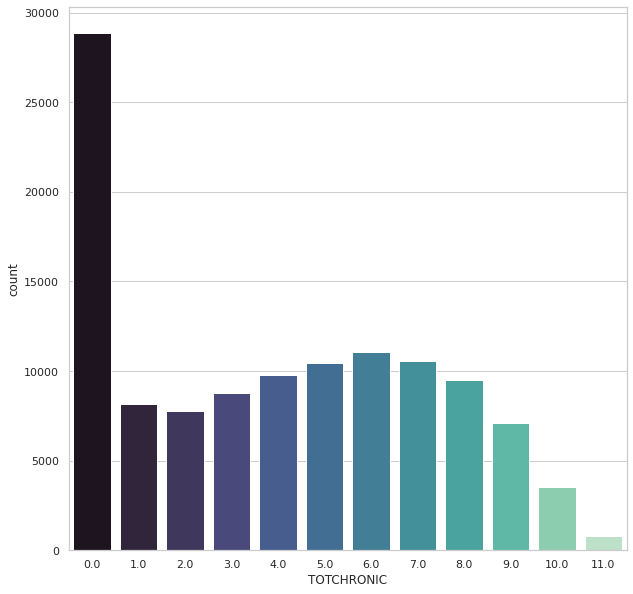

In [29]:
plt.rcParams["figure.figsize"] = (10.0, 10.0)
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(data=cc_summary_all, x="TOTCHRONIC", palette="mako")

Over the three year period, 25% of the beneficiaries had none of the noted chronic conditions.

7% had 1, 

7% had 2, 

8% had 3, 

8% had 4, 

9% had 5, 

10% had 6,

9% had 7,

8% had 8,

and the remaining 9% had 9 or more.


In [30]:
cc_summary_all["TOTCHRONIC"].value_counts(normalize=True)

0.0     0.248240
6.0     0.095205
7.0     0.090657
5.0     0.089600
4.0     0.084022
8.0     0.081856
3.0     0.075366
1.0     0.070320
2.0     0.066659
9.0     0.061097
10.0    0.030342
11.0    0.006636
Name: TOTCHRONIC, dtype: float64

In [32]:
cc_summary[:2008]["TOTCHRONIC"].value_counts(normalize=True)

0     0.350100
1     0.126992
2     0.119522
3     0.113546
4     0.108068
5     0.066733
6     0.050797
7     0.036355
8     0.016434
9     0.009462
10    0.001494
11    0.000498
Name: TOTCHRONIC, dtype: float64

In [34]:
desynpuf.drop(["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_ESRD",
               "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA", "BENE_SEX_IDENT_CD"], inplace=True, axis=1)

desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991604 entries, 0 to 991603
Columns: 123 entries, DESYNPUF_ID to B_ESRD
dtypes: datetime64[ns](2), float64(30), int64(21), object(70)
memory usage: 930.5+ MB


## Visits 2008-2010

Total Inpatient Claims: 66,029

Total Outpatient Claims: 776,259

In [35]:
claims_breakdown = desynpuf.groupby(["YEAR", "CLAIM_TYPE"])["CLAIM_TYPE"].count().to_frame()
claims_breakdown.columns = ["COUNT"]
claims_breakdown.head(6)

COUNT
YEAR CLAIM_TYPE        
2008 INPATIENT    27240
     OUTPATIENT  282069
2009 INPATIENT    24873
     OUTPATIENT  320990
2010 INPATIENT    13916
     OUTPATIENT  173200

In [36]:
desynpuf["CLAIM_TYPE"].value_counts()

OUTPATIENT    776259
INPATIENT      66029
Name: CLAIM_TYPE, dtype: int64

As the total number of chronic conditions increases, the total visits increases.

No surprises there!

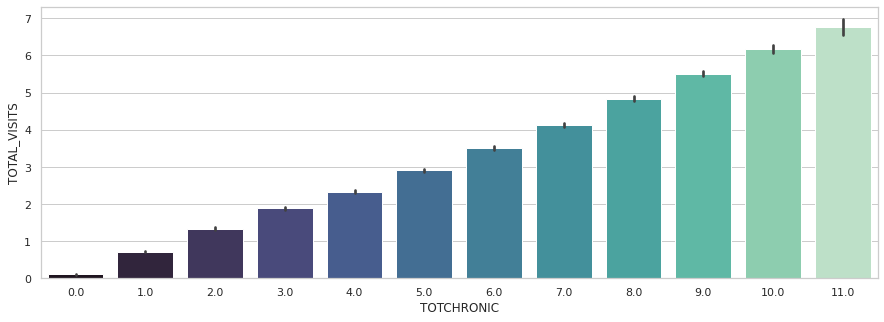

In [41]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="TOTAL_VISITS", data=cc_summary_all, palette="mako");

Costs also increased as number of conditions increased, really beginning to take off after 6 chronic conditions.

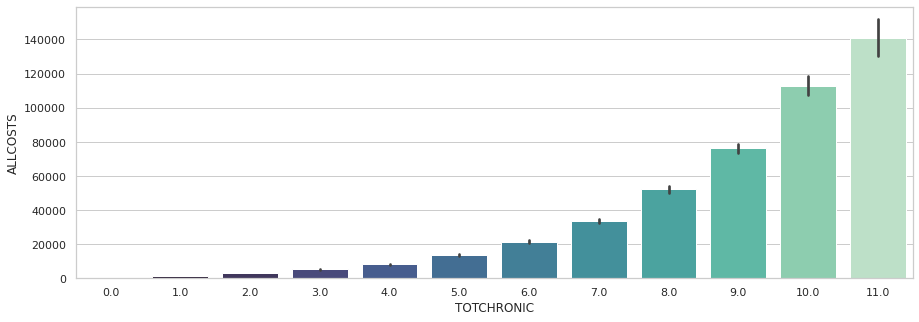

In [42]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="ALLCOSTS", data=cc_summary_all, palette="mako");

In [46]:
SUM_TOTAL = cc_summary_all["ALLCOSTS"].sum()
cc_summary_all["PERCENT_COSTS"] = cc_summary_all["ALLCOSTS"] / SUM_TOTAL * 100
cc_summary_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116339 entries, 0000438E79D01BEA to FFFFF4859B6D7402
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MEAN_AGE                      86464 non-null   float64
 1   B_SEX                         116339 non-null  float64
 2   BENE_RACE_CD                  116339 non-null  float64
 3   B_ALZHDMTA                    116339 non-null  float64
 4   B_CHF                         116339 non-null  float64
 5   B_CNCR                        116339 non-null  float64
 6   B_COPD                        116339 non-null  float64
 7   B_DEPRESSN                    116339 non-null  float64
 8   B_DIABETES                    116339 non-null  float64
 9   B_ISCHMCHT                    116339 non-null  float64
 10  B_OSTEOPRS                    116339 non-null  float64
 11  B_CHRNKIDN                    116339 non-null  float64
 12  B_RA_OA                 

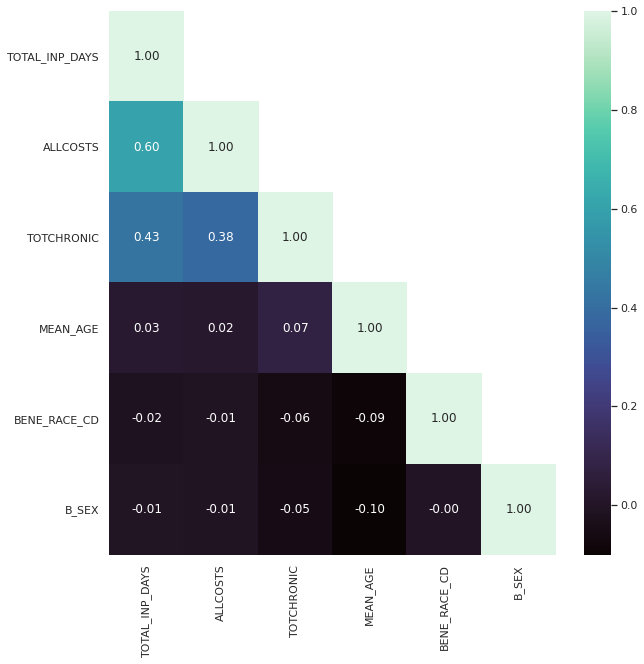

In [50]:
corr_subset = cc_summary_all[["TOTAL_INP_DAYS", "ALLCOSTS", "TOTCHRONIC", "MEAN_AGE", "BENE_RACE_CD", "B_SEX"]]
correlations = corr_subset.corr(method="pearson")
lh_corr = correlations.where(np.tril(np.ones(correlations.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
corr_hmap=sb.heatmap(lh_corr, annot=True, cmap="mako", fmt=".2f")
fig = corr_hmap.get_figure()
fig.savefig("desynpuf_corr1_heatmap.png")

There is a small association between being in a higher age category and the number of chronic conditions.

There is also a (slightly stronger) association between being female, and living to an older age.

There is also an association between being white and living to an older age. :-(

There is a strong correlation between the number of chronic conditions and total number of inpatient days and a very strong correlation between the total number of inpatient days and total costs. Outpatient visits are more numerous, but clearly, inpatient visits are more expensive.

Let's see this by specific condition.

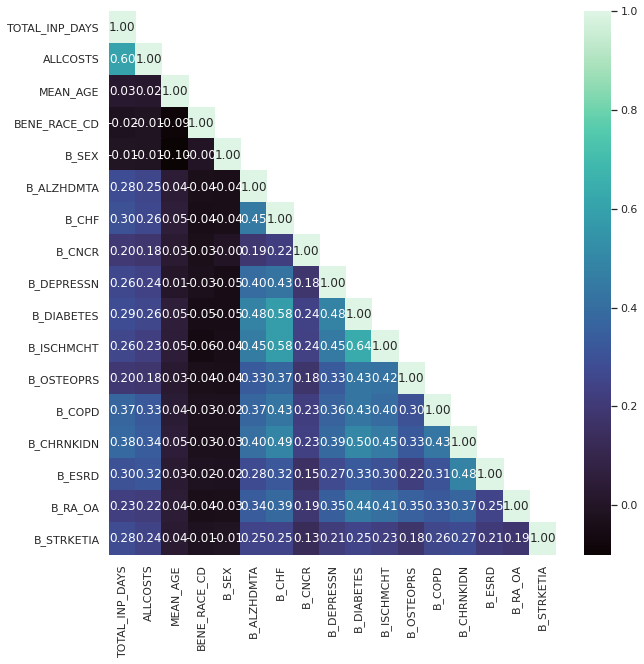

In [51]:
cost_ed_conds = cc_summary_all[["TOTAL_INP_DAYS", "ALLCOSTS", "MEAN_AGE", "BENE_RACE_CD", "B_SEX",
                                "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", "B_DIABETES", 
                                "B_ISCHMCHT", "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_ESRD",
                                "B_RA_OA", "B_STRKETIA"]]
cost_ed_corr = cost_ed_conds.corr(method="pearson")
lr_cost_ed_corr = cost_ed_corr.where(np.tril(np.ones(cost_ed_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
cost_ed_hmap=sb.heatmap(lr_cost_ed_corr, annot=True, cmap="mako", fmt=".2f")
fig = cost_ed_hmap.get_figure()
fig.savefig("cost_desynpuf_conditions_heatmap.png")

This graph does a great job of showing where all the multicollinearity is between all these variables.

Luckily, it doesn't look like our demographic data has much of an impact here - those correlations with the outcomes are small.

### Most Inpatient Days by Condition

CKD, COPD, ESRD & CHF, Diabetes, Alzheimer's & Stroke, Depression & Ischemic Heart Disease, RA/OA, Osteoporosis & Cancer

### Highest Cost by Condition

CKD, COPD, ESRD, Diabetes & CHF, Alzheimer's, Depression & Stroke, Ischemic Heart Disease, RA/OA, Osteoporosis & Cancer

In [52]:
cc_summary.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_YEARS.csv")

In [54]:
cc_summary_all.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_ALL.csv")

In [55]:
cc_summary_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116339 entries, 0000438E79D01BEA to FFFFF4859B6D7402
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MEAN_AGE                      86464 non-null   float64
 1   B_SEX                         116339 non-null  float64
 2   BENE_RACE_CD                  116339 non-null  float64
 3   B_ALZHDMTA                    116339 non-null  float64
 4   B_CHF                         116339 non-null  float64
 5   B_CNCR                        116339 non-null  float64
 6   B_COPD                        116339 non-null  float64
 7   B_DEPRESSN                    116339 non-null  float64
 8   B_DIABETES                    116339 non-null  float64
 9   B_ISCHMCHT                    116339 non-null  float64
 10  B_OSTEOPRS                    116339 non-null  float64
 11  B_CHRNKIDN                    116339 non-null  float64
 12  B_RA_OA                 

In [57]:
cc_summary3 = cc_summary_all.copy()
cc_summary3.reset_index()
cc_county = cc_summary3.groupby(["FIPS_STATE_CODE", "FIPS_COUNTY_CODE"]).aggregate({"MEAN_AGE":"mean",
                                                                                  "B_SEX":"mean",
                                                                                  "BENE_RACE_CD":"mean",
                                                                                  "B_ALZHDMTA":"sum",
                                                                                  "B_CHF":"sum",
                                                                                  "B_CNCR":"sum",
                                                                                  "B_COPD":"sum",
                                                                                  "B_DEPRESSN":"sum",
                                                                                  "B_DIABETES":"sum",
                                                                                  "B_ISCHMCHT":"sum",
                                                                                  "B_OSTEOPRS":"sum",
                                                                                  "B_CHRNKIDN":"sum",
                                                                                  "B_RA_OA":"sum",
                                                                                  "B_STRKETIA":"sum",
                                                                                  "B_ESRD":"sum",
                                                                                  "MEAN_HI_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_SMI_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_HMO_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_CVRG_MOS_NUM":"mean",
                                                                                  "TOTAL_VISITS":"sum",
                                                                                  "TOTAL_CLAIMS":"sum",
                                                                                  "NUM_PRVDRS":"mean",
                                                                                  "TOT_CLM_PMT_AMT":"sum",
                                                                                  "TOT_NCH_PRMRY_PYR_CLM_PD_AMT":"sum",
                                                                                  "NUM_AT_PHYSNS":"mean",
                                                                                  "NUM_OP_PHYSNS":"mean",
                                                                                  "NUM_OT_PHYSNS":"mean",
                                                                                  "UNQ_ADMTNG_ICD9_CDS":"mean",
                                                                                   "TOT_ADMTNG_ICD9_CDS":"sum",
                                                                                   "TOTAL_INP_DAYS":"sum",
                                                                                   "MEAN_INP_STAY":"mean",
                                                                                   "MIN_INP_STAY": "min",
                                                                                   "MAX_INP_STAY": "max",
                                                                                   "UNQ_CLM_DRG_CDS":"mean",
                                                                                   "TOT_CLM_DRG_CDS":"sum",
                                                                                    "TOT_MEDREIMB_IP":"sum",
                                                                                  "TOT_BENRES_IP":"sum",
                                                                                  "TOT_PPPYMT_IP":"sum",
                                                                                  "TOT_MEDREIMB_OP":"sum",
                                                                                  "TOT_BENRES_OP":"sum",
                                                                                  "TOT_PPPYMT_OP":"sum",
                                                                                  "CBSA":"mean",
                                                                                  "TOTCHRONIC":["sum","mean"],
                                                                                  "TOTIPCOST":"sum",
                                                                                   "TOTOPCOST":"sum",
                                                                                   "ALLCOSTS":"sum"})


cc_county.columns = ["MEAN_AGE", "MEAN_SEX", "MEAN_RACE_CD", "ALZHDMTA_CASES", "CHF_CASES", "CNCR_CASES", 
                     "COPD_CASES","DEPRESSN_CASES", "DIABETES_CASES", "ISCHMCHT_CASES", "OSTEOPRS_CASES", 
                     "CHRNKIDN_CASES", "RA_OA_CASES","STRKETIA_CASES", "ESRD_CASES", 
                     "MEAN_HI_CVRAGE_TOT_MONS", "MEAN_SMI_CVRAGE_TOT_MONS","MEAN_HMO_CVRAGE_TOT_MONS", 
                     "MEAN_CVRG_MOS_NUM", "TOTAL_VISITS","TOTAL_CLAIMS",
                      "MEAN_NUM_PRVDRS", "TOT_CLM_PMT_AMT", "TOT_NCH_PRMRY_PYR_CLM_PD_AMT","MEAN_NUM_AT_PHYSNS",
                      "MEAN_NUM_OP_PHYSNS","MEAN_NUM_OT_PHYSNS","MEAN_UNQ_ADMTNG_ICD9_CDS", "TOT_ADMTNG_ICD9_CDS",
                      "TOTAL_INP_DAYS", "MEAN_INP_STAY", "MIN_INP_STAY", "MAX_INP_STAY","MEAN_UNQ_CLM_DRG_CDS",
                      "TOT_CLM_DRG_CDS", "TOT_MEDREIMB_IP", "TOT_BENRES_IP", "TOT_PPPYMT_IP", "TOT_MEDREIMB_OP",
                       "TOT_BENRES_OP","TOT_PPPYMT_OP", "CBSA", "TOTAL_CC_CASES", "MEAN_CC_CASES", "TOTIPCOST",
                       "TOTOPCOST", "ALLCOSTS"]

C_TOTAL = cc_county["ALLCOSTS"].sum()
cc_county["PERCENT_COSTS"] = cc_county["ALLCOSTS"] / C_TOTAL * 100

cc_county

MEAN_AGE  MEAN_SEX  MEAN_RACE_CD  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                      
1.0             1.0               65.414744  0.187500      1.312500   
                3.0               70.323427  0.463158      1.378947   
                5.0               72.427083  0.642857      1.500000   
                7.0               68.983830  0.411765      1.294118   
                9.0               68.788641  0.636364      1.409091   
...                                     ...       ...           ...   
56.0            37.0              72.907924  0.529412      1.000000   
                39.0              70.450952  0.538462      1.000000   
                41.0              71.936508  0.500000      1.111111   
                43.0                    NaN  0.625000      1.000000   
                45.0              75.500000  0.600000      1.000000   

                                  ALZHDMTA_CASES  CHF_CASES  CNCR_CASES  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                          
1.0             1.0                          7.0       12.0         3.0   
                3.0                         34.0       46.0        18.0   
                5.0                          4.0        7.0         0.0   
                7.0                          7.0        9.0         2.0   
                9.0                          4.0        6.0         4.0   
...                                          ...        ...         ...   
56.0            37.0                         8.0       14.0         8.0   
                39.0                         2.0        3.0         3.0   
                41.0                         4.0        3.0         2.0   
                43.0                         0.0        0.0         0.0   
                45.0                         1.0        1.0         0.0   

                                  COPD_CASES  DEPRESSN_CASES  DIABETES_CASES  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                               
1.0             1.0                      4.0             7.0             9.0   
                3.0                     22.0            33.0            52.0   
                5.0                      2.0             5.0             7.0   
                7.0                      6.0            10.0            10.0   
                9.0                      3.0             4.0             6.0   
...                                      ...             ...             ...   
56.0            37.0                     5.0             7.0            12.0   
                39.0                     0.0             2.0             3.0   
                41.0                     2.0             3.0             4.0   
                43.0                     0.0             0.0             0.0   
                45.0                     1.0             0.0             1.0   

                                  ISCHMCHT_CASES  ...  TOT_MEDREIMB_OP  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                  ...                    
1.0             1.0                         13.0  ...     41996.666667   
                3.0                         57.0  ...    644550.000000   
                5.0                         10.0  ...     45453.333333   
                7.0                         10.0  ...     79390.000000   
                9.0                          9.0  ...     38990.000000   
...                                          ...  ...              ...   
56.0            37.0                        14.0  ...    189740.000000   
                39.0                         3.0  ...     18550.000000   
                41.0                         3.0  ...     16526.666667   
                43.0                         0.0  ...         0.000000   
                45.0                         2.0  ...       533.333333   

                                  TOT_BENRES_OP  TOT_PPPYMT_OP     CBSA  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                        

In [58]:
cc_county.to_csv("/home/kylier/python/DS/data/PUF/PUF_COUNTY_SUMMARY.csv")